## Exploring Urban Form using OSMnx

Let's select 

- A  town (say Santa Fe), to be able to download everything
- A region from a big city (for example Hyde Park)
- A region from a less developed city, for example Port-au-Prince

And do the following:

- Find (and plot) the building footprints
- Find (and plot) the drivable street networks

Estimate the fractal dimension in each case, and compare the diffenrence between the FD fo the building footprints and street networks.

### Building Footprints

In [1]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
from matplotlib import rcParams
import geopandas as gpd
rcParams['font.family'] = 'serif'
plot_pretty()
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import osmnx as ox

#### Get the buildings of Santa Fe, New Mexico

In [3]:
sf_build = ox.buildings_from_place(place='Santa Fe, NM')
sf_build = ox.project_gdf(sf_build)

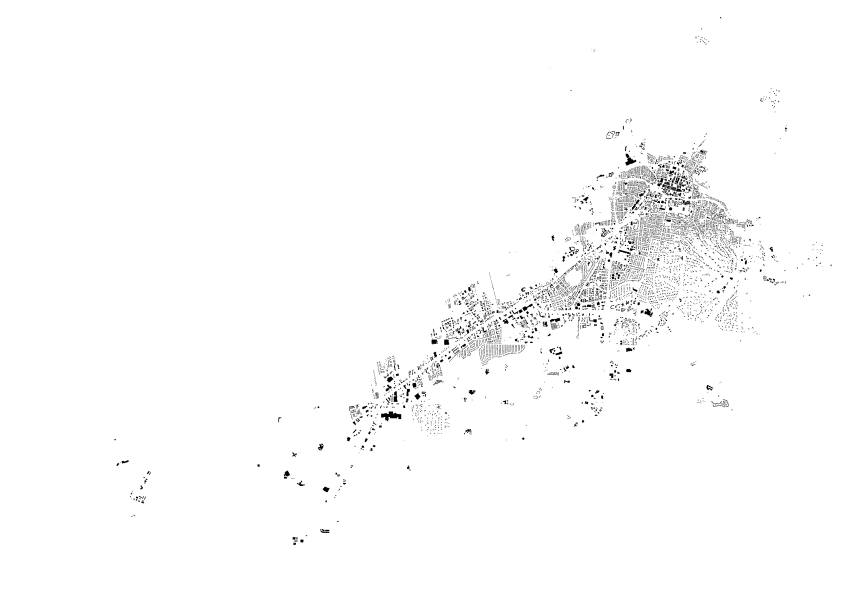

In [9]:
fig, ax = ox.plot_buildings(sf_build, bgcolor='w', color='#000000', 
                            save=True, show=True, close=True, filename='Santa_Fe_buildings',file_format='png', dpi=3000)

Question: What is the resolution (in meters) in the above plot?

#### Get the all the buildings, two km East-West, North-South of UChicago

Coordinates of UChicago: (41.7886° N, 87.5987° W) 

In [21]:
point_UC = (41.7886, -87.5987)
dist = 2000 # Distance in m
UC_build = ox.buildings_from_point(point=point_UC, distance=dist)
UC_build = ox.project_gdf(UC_build)

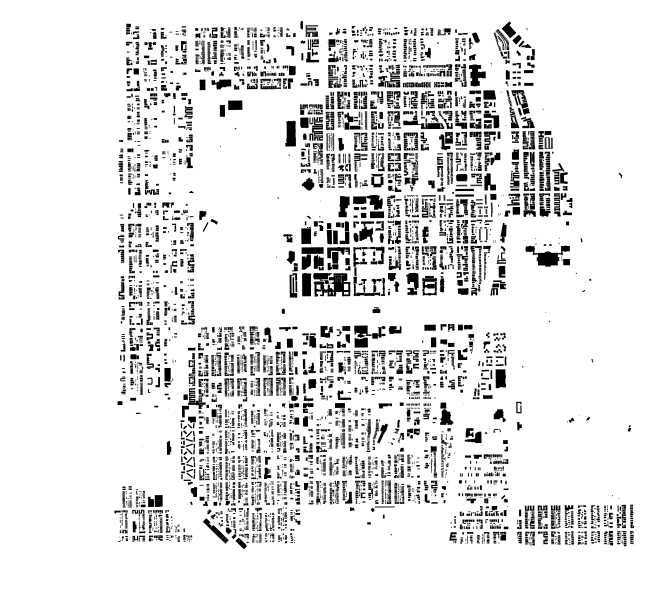

In [22]:
fig, ax = ox.plot_buildings(UC_build, bgcolor='w', color='#000000', 
                            save=True, show=True, close=True, filename='UC_buildings',file_format='png', dpi=3000)

#### Get the all the buildings, two km East-West, North-South of the center of Port-au-Prince

Coordinates of Port-au-Prince: (18.522240 N, 72.347607 W)


In [25]:
point_PaP = (18.522240, -72.347607)
dist = 2000 # Distance in m
PaP_build = ox.buildings_from_point(point=point_PaP, distance=dist)
PaP_build = ox.project_gdf(PaP_build)

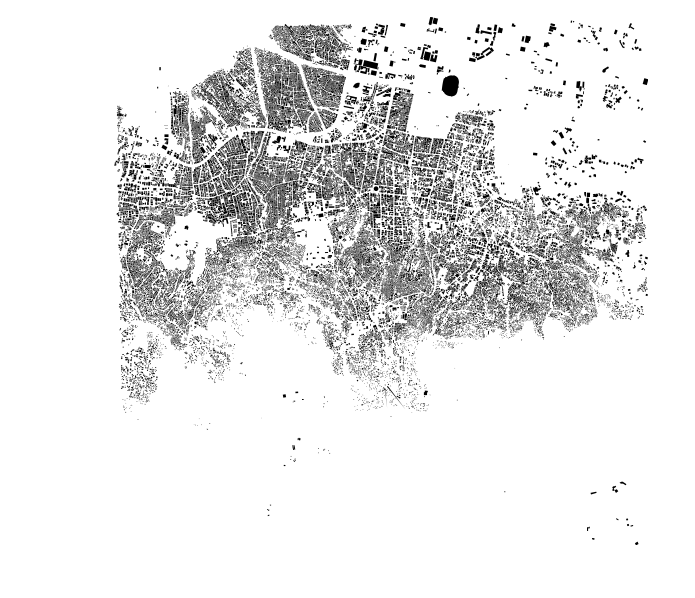

In [26]:
fig, ax = ox.plot_buildings(PaP_build, bgcolor='w', color='#000000', 
                            save=True, show=True, close=True, filename='PaP_buildings',file_format='png', dpi=3000)

From a very fast (and not that careful) computation of the fractal dimensions of the three regions, I have:

- FD of Santa Fe: $\sim$ 1.44
- FD of the region around UChicago: $\sim$ 1.54
- FD of the region around the favelas of Port-au-Prince: $\sim$ 1.64

Qualitatively, the results seem to make sence.

### Get now the Street networks in the same regions

Now I will get (and plot) the street networks in the same regions (figure ground diagrams).

For simplicity I will keep only the driveable (key = "drive") streets; later I can elaborate on that.

Furthermore, I use the same resolution as above (dpi = 3000) and the default settings for the street widths. We can elaborate on that later.

#### Drivable street network of Santa Fe, NM

In [45]:
street_widths = {'footway' : 0.0,
                 'steps' : 0.0,
                 'pedestrian' : 0.0,
                 'path' : 0.05,
                 'track' : 0.05,
                 'service' : 0.05,
                 'residential' : 0.05,
                 'primary' : 0.1,
                 'motorway' : 0.2}

In [46]:
#G_SF = ox.graph_from_place('Santa Fe, NM', network_type='drive')

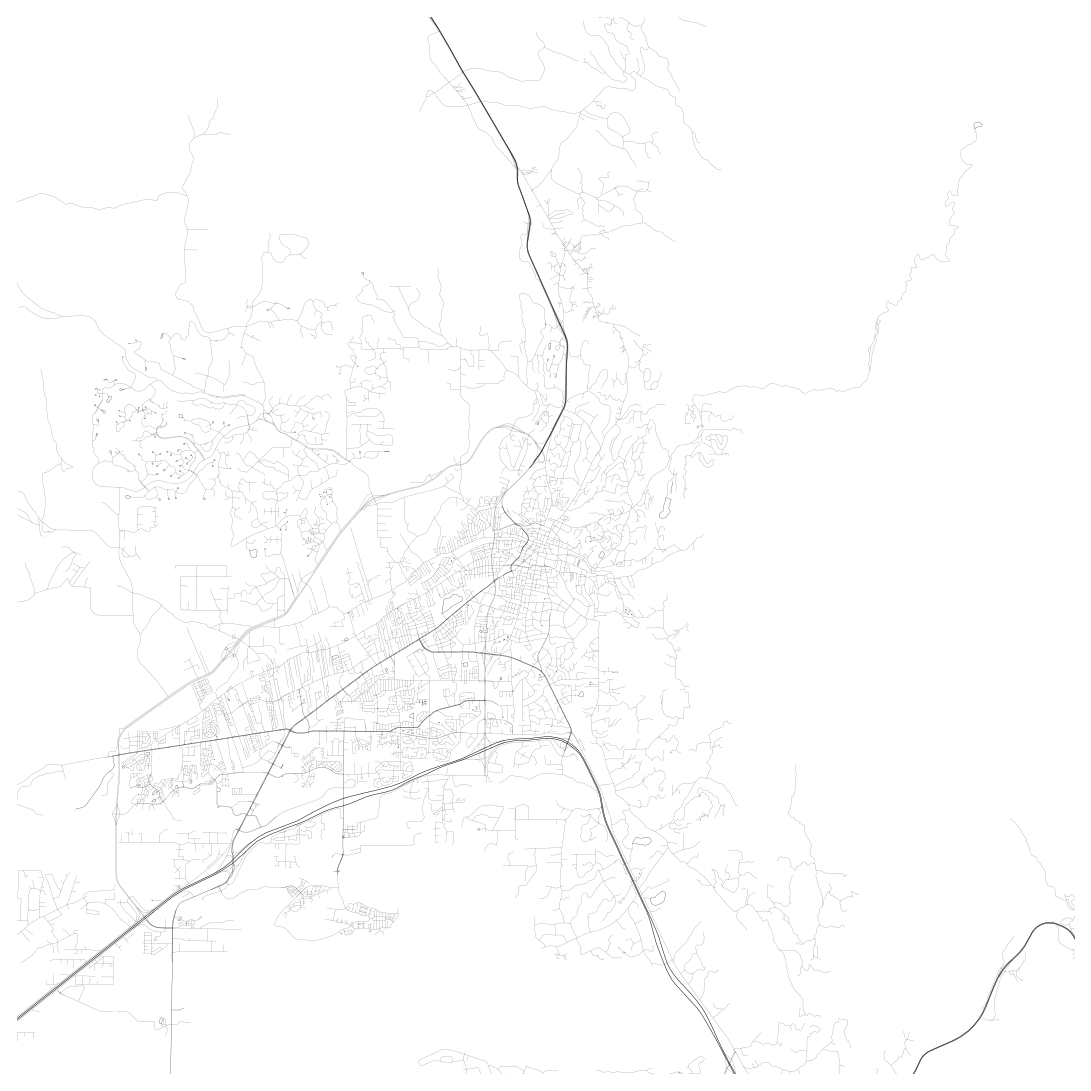

In [47]:
point_SF = (35.6870, -105.9378)
fig, ax = ox.plot_figure_ground(point = point_SF,network_type='drive', dist=15000,street_widths=street_widths,
                                default_width=0.05, edge_color='#000000', bgcolor='w',
                                save=True, show=True, close=True, filename='SF_streets',file_format='png', dpi=3000)

#### Drivable street network, two km East-West, North-South of UChicago

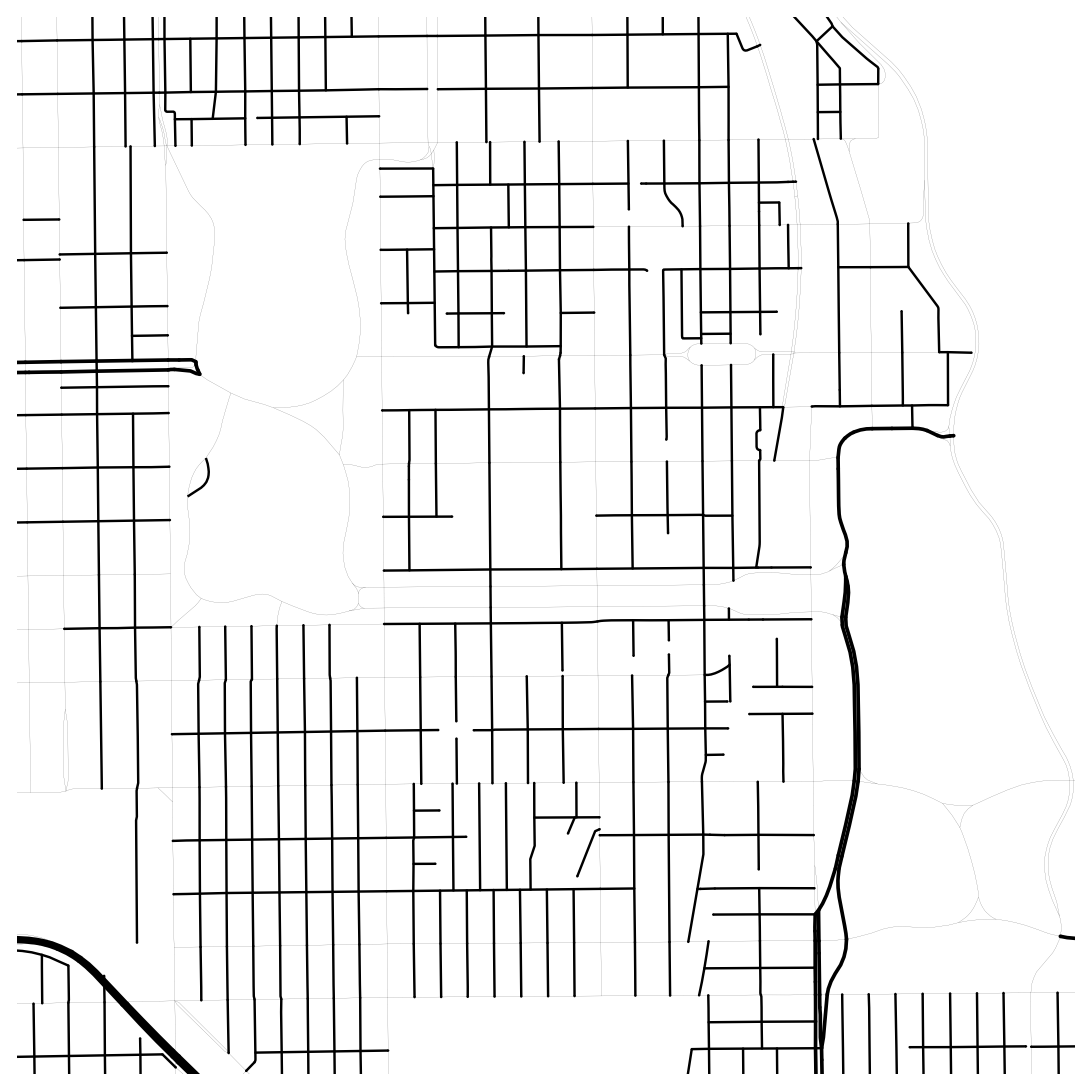

In [55]:
street_widths = {'footway' : 0.0,
                 'steps' : 0.0,
                 'pedestrian' : 0.0,
                 'path' : 0.05,
                 'track' : 0.5,
                 'service' : 0.7,
                 'residential' : 1.0,
                 'primary' : 1.5,
                 'motorway' : 2.0}
fig, ax = ox.plot_figure_ground(point = point_UC,network_type='drive', dist=2000,street_widths=street_widths,
                                default_width=0.05, edge_color='#000000', bgcolor='w',
                                save=True, show=True, close=True, filename='UC_streets',file_format='png', dpi=3000)

#### Drivable street network, two km East-West, North-South of the center of Port-au-Prince favelas

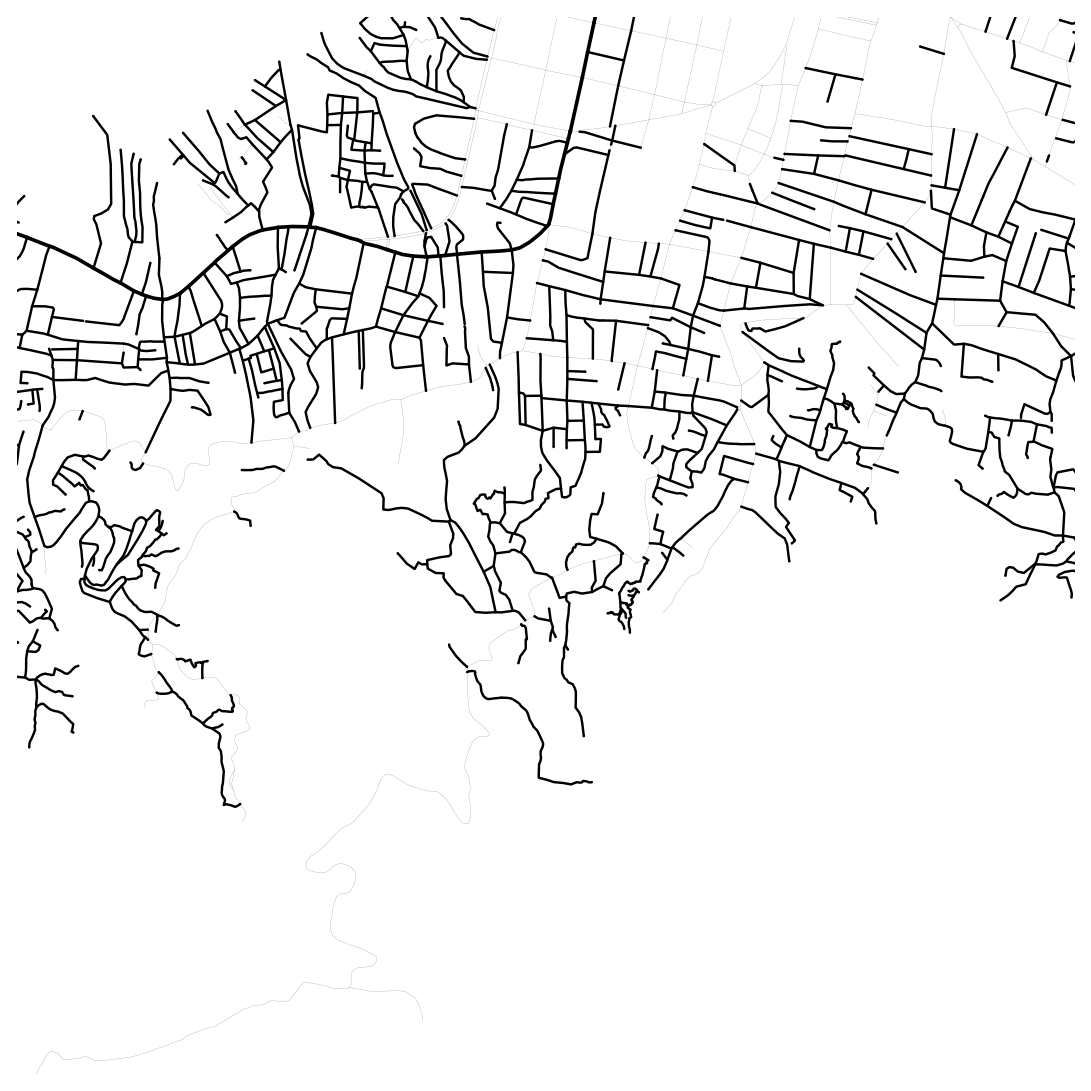

In [56]:
street_widths = {'footway' : 0.0,
                 'steps' : 0.0,
                 'pedestrian' : 0.0,
                 'path' : 0.05,
                 'track' : 0.5,
                 'service' : 0.7,
                 'residential' : 1.0,
                 'primary' : 1.5,
                 'motorway' : 2.0}
fig, ax = ox.plot_figure_ground(point = point_PaP,network_type='drive', dist=2000,street_widths=street_widths,
                                default_width=0.05, edge_color='#000000', bgcolor='w',
                                save=True, show=True, close=True, filename='PaP_streets',file_format='png', dpi=3000)

Fractal dimensions of the street networks:

- FD of the drivable street network of Santa Fe: $\sim$ 1.437
- FD of the drivable street network around UChicago: $\sim$ 1.529
- FD of the drivable street network around the Haitian favelas: $\sim$ 1.55

We can see that, although the fractal dimension of the buildings' footprint in Santa Fe and Chicago is comparable to that of the street network, the FD of 